## Menyiapkan Dataset

In [1]:
# import pustaka
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn


In [2]:
# memanggil dataset
dataset=pd.read_csv('populasi.csv')
X=dataset.iloc[:, :1]
Y=dataset.iloc[:,1].values
dataku=pd.DataFrame(dataset)

# memanggil data yg akan diprediksi
datauji=pd.read_csv('prediksipopulasi.csv')
X_uji = datauji.iloc[:, :1]
Y

array([1.88, 2.08, 2.32, 2.52, 2.75, 3.01])

In [3]:
# membagi/split Data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.1, random_state = 0)
print(X_test)
print("-----------------")
print(X_uji)

   Tahun
5   2018
-----------------
   Tahun
0   2021
1   2024
2   2027
3   2030
4   2033
5   2036


## Proses Pemodelan

In [4]:
# Fitting pd Data Training
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

# Memprediksi hasil dgn data Tes
y_pred=regressor.predict(X_uji)
print(y_pred)

[3.182 3.4   3.618 3.836 4.054 4.272]


In [5]:
# Menyimpan Hasil ke File CSV
tahunuji = np.array(X_uji)
tahun = pd.DataFrame(tahunuji)
prediksi = pd.DataFrame(y_pred)
hasil=pd.concat([tahun, prediksi], axis=1)
np.savetxt('hasil.csv', hasil, delimiter=',')
hasil

,0,0
0,2021,3.182
1,2024,3.400
2,2027,3.618
3,2030,3.836
4,2033,4.054
5,2036,4.272


## Pembuatan Grafik/Plot

<function matplotlib.pyplot.show(close=None, block=None)>

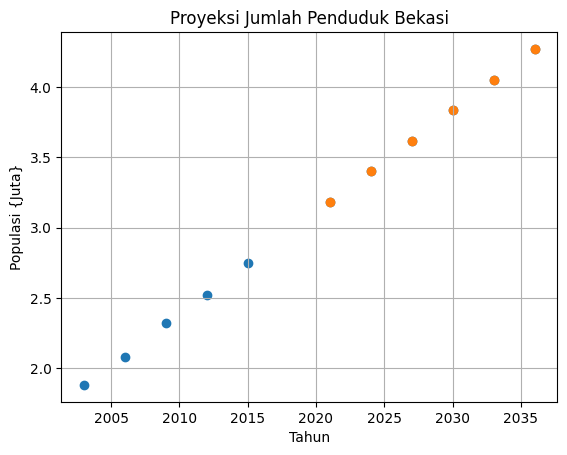

In [7]:
# Visualisasi Data
# Menggabungkan Data Training dan hasil prediksi
absis=(np.concatenate([X_train,X_uji]))
ordinat=np.concatenate([Y_train,y_pred])

# Plot Total
plt.scatter(absis, ordinat)

# Plot Proyeksi
plt.scatter(tahun, prediksi)
plt.xlabel("Tahun")
plt.ylabel("Populasi {Juta}")
plt.title("Proyeksi Jumlah Penduduk Bekasi")
plt.grid()
plt.show